In [1]:
import tensorflow as tf
import numpy as np
from model import Model
from cons import IMG_H, IMG_W
import utils
import pandas as pd
import seaborn as sns

### define the first model

In [132]:
model_1 = Model(batch_size=1000, code_size=1)

#### create event file to see the graph in Tensorboard

In [3]:
model_1.graph_summary('logs/log_1')

#### train the model

In [4]:
model_1.train(learning_rate=0.05,
              niter=500,
              load_model=None, 
              save_model='models/model_1',
              print_every=100,
              test_data=utils.x_test)

model initialized
batch loss: 70491.6	test loss: 172577.8
batch loss: 15904.9	test loss: 89221.0
batch loss: 14794.3	test loss: 20038.6
batch loss: 14334.8	test loss: 17095.3
batch loss: 14209.9	test loss: 15232.9
model saved at models/model_1


#### have a look at output images

In [5]:
x = utils.get_random_batch(utils.x_test, model_1.batch_size)
code, gen = model_1.feedforward(x, model_path='models/model_1')

INFO:tensorflow:Restoring parameters from models/model_1


In [6]:
gen.shape

(1000, 28, 28, 1)

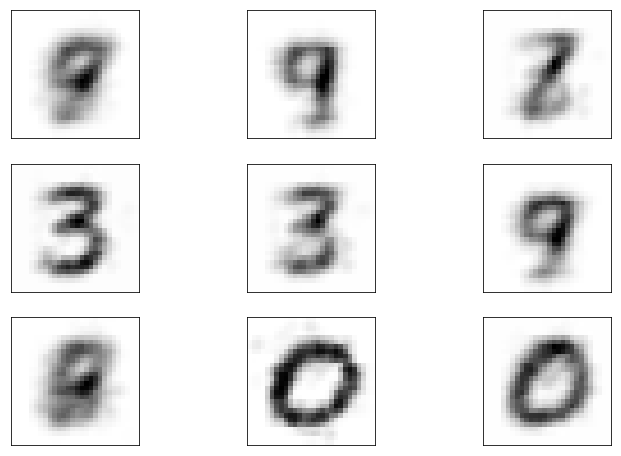

In [7]:
utils.plot_images(gen)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


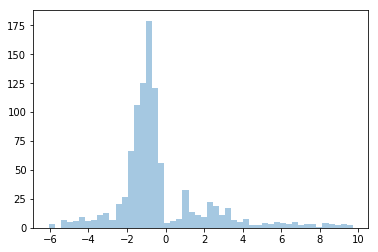

In [8]:
utils.distplot(code)

INFO:tensorflow:Restoring parameters from models/model_1


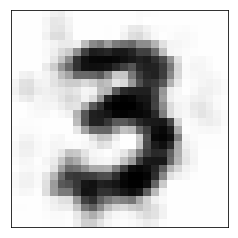

In [167]:
utils.plot_from_code([10.0], model_1, 'models/model_1')

#### let's visualize the output as a function of the code

In [13]:
input_code = np.linspace(-6.,10., model_1.batch_size)[:,np.newaxis]

In [14]:
_, gen = model_1.feedforward(input_batch=None, input_code=input_code, model_path='models/model_1')

INFO:tensorflow:Restoring parameters from models/model_1


In [15]:
gen.shape

(1000, 28, 28, 1)

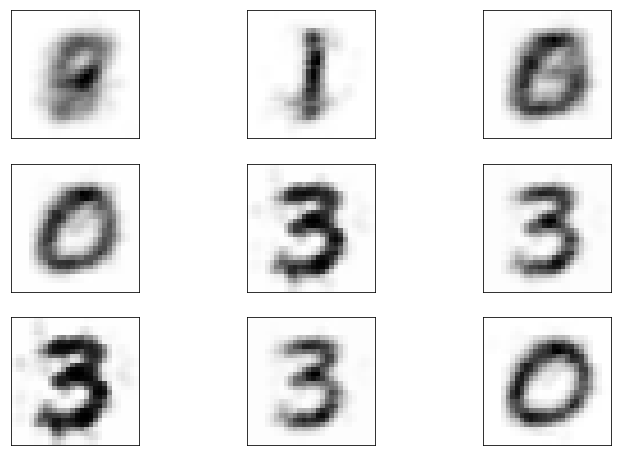

In [16]:
utils.plot_images(gen)

In [17]:
images = utils.get_images_from_generated(gen, step_size=10)

In [18]:
len(images)

100

In [19]:
utils.export_images(images, name='code_1.gif', delay=20)

code_1.gif was created


### create another model with code size of 2

In [2]:
model_2 = Model(batch_size=1000, code_size=2)

In [22]:
model_2.train(learning_rate=0.03,
              niter=500,
              load_model=None, 
              save_model='models/model_2',
              print_every=100,
              test_data=utils.x_test)

model initialized
batch loss: 66387.1	test loss: 228995.3
batch loss: 13678.6	test loss: 92958.7
batch loss: 12748.6	test loss: 14928.7
batch loss: 12263.8	test loss: 15789.1
batch loss: 12099.9	test loss: 14547.7
model saved at models/model_2


In [24]:
model_2.train(learning_rate=0.01,
              niter=500,
              load_model='models/model_2', 
              save_model='models/model_2',
              print_every=100,
              test_data=utils.x_test)

INFO:tensorflow:Restoring parameters from models/model_2
batch loss: 12098.1	test loss: 12288.7
batch loss: 11640.6	test loss: 12162.5
batch loss: 11623.2	test loss: 11699.1
batch loss: 11505.4	test loss: 11508.7
batch loss: 11288.2	test loss: 11506.5
model saved at models/model_2


In [3]:
x, y = utils.get_random_batch_with_labels(utils.x_test, utils.y_test, model_2.batch_size)
code, gen = model_2.feedforward(x, model_path='models/model_2')

INFO:tensorflow:Restoring parameters from models/model_2


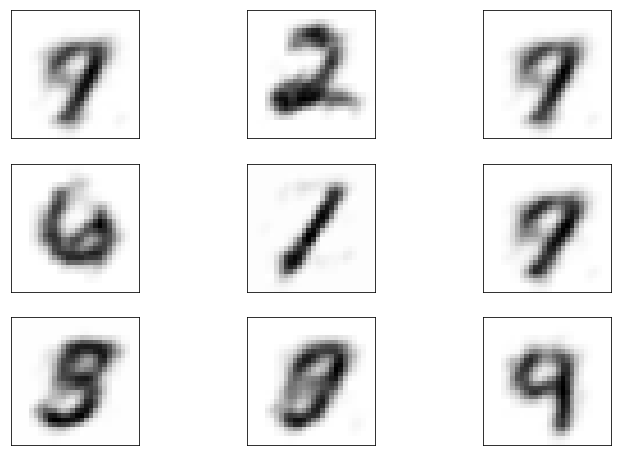

In [4]:
utils.plot_images(gen)

In [5]:
code.shape

(1000, 2)

In [6]:
df = pd.DataFrame({'x':code[:,0], 'y':code[:,1], 'label': y})

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


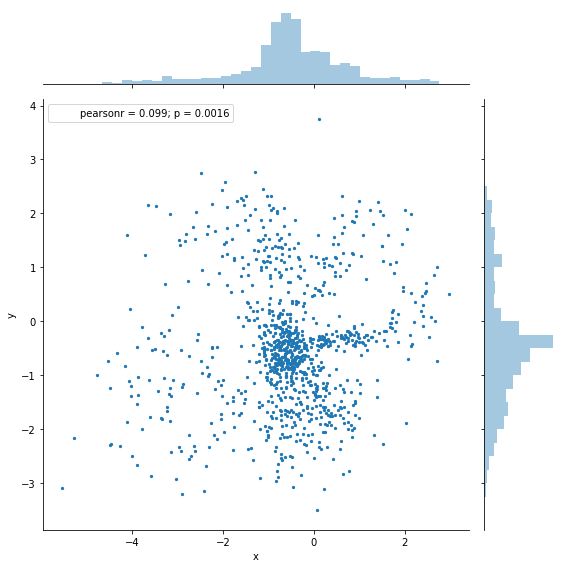

In [7]:
sns.jointplot(x='x', y='y', data=df, s=5, size=8)

INFO:tensorflow:Restoring parameters from models/model_2


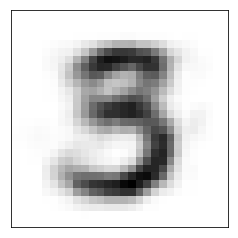

In [197]:
utils.plot_from_code([.0,-2.0], model_2, 'models/model_2')

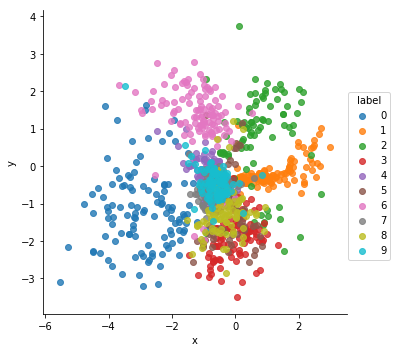

In [90]:
sns.lmplot(x='x', y='y', data=df, hue='label', fit_reg=False, size=5)

In [86]:
batch_0 = utils.get_batch_with_label(1, model_2.batch_size)

In [87]:
batch_0.shape

(1000, 28, 28, 1)

In [88]:
code, gen = model_2.feedforward(batch_0, model_path='models/model_2')

INFO:tensorflow:Restoring parameters from models/model_2


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


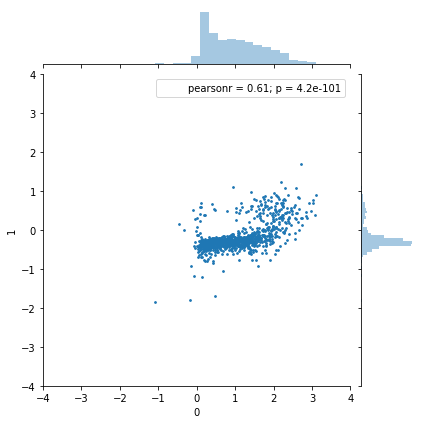

In [89]:
sns.jointplot(x=0, y=1, data=pd.DataFrame(code), kind='scatter', xlim=(-4,4),ylim=(-4,4), s=3)

### create another model with code size of 25

In [8]:
model_3 = Model(batch_size=1000, code_size=25)

In [9]:
model_3.train(learning_rate=0.05,
              niter=500,
              load_model=None, 
              save_model='models/model_3',
              print_every=100,
              test_data=utils.x_test)

model initialized
batch loss: 69565.6	test loss: 215801.7
batch loss: 4237.7	test loss: 117224.1
batch loss: 3165.5	test loss: 35860.9
batch loss: 2822.1	test loss: 16150.4
batch loss: 2735.7	test loss: 10600.1
model saved at models/model_3


In [10]:
model_3.train(learning_rate=0.01,
              niter=500,
              load_model='models/model_3', 
              save_model='models/model_3',
              print_every=100,
              test_data=utils.x_test)

INFO:tensorflow:Restoring parameters from models/model_3
batch loss: 2683.7	test loss: 9654.3
batch loss: 2521.5	test loss: 3025.8
batch loss: 2564.4	test loss: 2477.7
batch loss: 2460.8	test loss: 2420.7
batch loss: 2497.9	test loss: 2479.2
model saved at models/model_3


In [11]:
model_3.train(learning_rate=0.002,
              niter=500,
              load_model='models/model_3', 
              save_model='models/model_3',
              print_every=100,
              test_data=utils.x_test)

INFO:tensorflow:Restoring parameters from models/model_3
batch loss: 2362.1	test loss: 2356.1
batch loss: 2414.2	test loss: 2362.0
batch loss: 2384.7	test loss: 2324.9
batch loss: 2378.1	test loss: 2329.6
batch loss: 2492.7	test loss: 2261.3
model saved at models/model_3


In [12]:
model_3.transitions([0,1], name='tr_0.gif', model_path='models/model_3', delay=5, step_size=10)

INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
tr_0.gif was created


In [13]:
model_3.transitions([0,1,2], name='tr_1.gif', model_path='models/model_3', delay=5, step_size=10)

INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
tr_1.gif was created


In [16]:
model_3.transitions([0,1,2,3,4,5,6,7,8,9], name='tr_2.gif', model_path='models/model_3', delay=5, step_size=30)

INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
tr_2.gif was created


In [17]:
model_3.transitions([0]*20, name='tr_3.gif', model_path='models/model_3', delay=5, step_size=30)

INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring param

In [28]:
model_3.transitions([8]*20, name='tr_12.gif', model_path='models/model_3', delay=5, step_size=30)

INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring parameters from models/model_3
INFO:tensorflow:Restoring param